In [12]:
# Bayesian HW Set 4: Markov Chain Monte Carlo
# February 2025

##  author: Alexis Hudes
##  copyright by the author
##  distributed under the GNU general public license
##  https://www.gnu.org/licenses/gpl.html
##  no warranty (see license details at the link above)

#Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde, t
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
from scipy.stats import truncnorm
import random

#set seed
np.random.seed(42)

In [9]:
# Metropolis Hasting Algorithm for fuel level
# Number of samples (determined by trial and error to converge)
n = 3*10**6

# uniform prior from 0 to 182
def prior(x):
    return 1 / 183 if 0 <= x <= 182 else 0

# likelihood function is a normal distribution with mean x and std 20, measured at 34 liters
def likelihood(x):
    return norm.pdf(x, loc=34, scale=20)

# Metropolis-Hastings algorithm
def met(n, init):
    samples = []
    current_sample = init
    accept = []
    
    for i in range(n):
        # Propose a new sample
        proposed_sample = np.random.normal(current_sample, 90)
        
        # Calculate the acceptance ratio
        current_likelihood = likelihood(current_sample) * prior(current_sample)
        proposed_likelihood = likelihood(proposed_sample) * prior(proposed_sample)
        
        acceptance_ratio = proposed_likelihood / current_likelihood
        
        # Accept or reject
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
            accept.append(1)
        else:
            accept.append(0)

        #creating a 'burn in' period of 1% of the samples
        if i > n*0.01:
            samples.append(current_sample)
    
    return np.array(samples), accept

# run with n samples and a random initial sample
samples_MH, acceptance = met(n, np.random.uniform(low=0, high=182))

The acceptance rate is: 0.2469


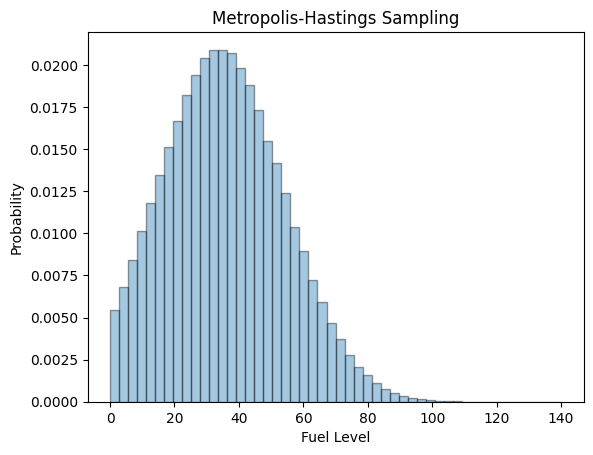

In [10]:
#Plotting results
#acceptance rate
aceptance_rate=sum(acceptance)/len(acceptance)
print("The acceptance rate is:", aceptance_rate)

# Plot the histogram of the samples
plt.hist(samples_MH, bins=50, density=True, alpha=0.4, edgecolor='black')

# Title and labels
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('Fuel Level')
plt.ylabel('Probability')

# Show plot and legend
plt.show()
plt.close()

In [11]:
# Convergence testing

# define the confidence interval convergence check, based on the example from workflow.r
def check_convergence(chain, threshold):
    # Compute the confidence interval of the mean
    ci = 2 * t.ppf(0.975, len(chain)) * np.std(chain) / np.sqrt(len(chain))
    print("The confidence interval is:", ci)

    # Check if the confidence interval is less than the threshold
    if ci <= threshold:
        return True
    else:
        return False

# Check convergence 
converged = check_convergence(samples_MH, threshold=0.05)

if converged:
    print("The chain has converged")
else:
    print("The chain has not converged")


The confidence interval is: 0.04125973594492995
The chain has converged


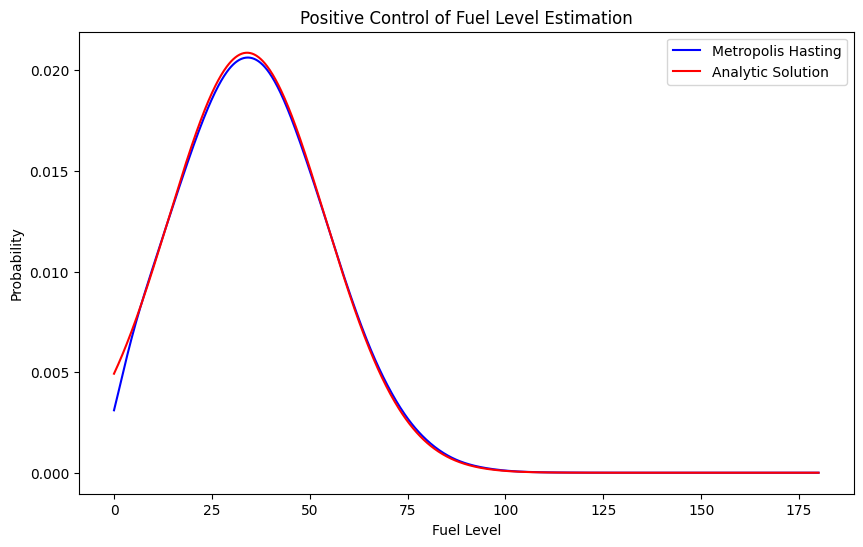

In [21]:
#Positive Control

# KDE estimation from the samples
kde = gaussian_kde(samples_MH, bw_method=0.2)

# Create a range of x values to evaluate the pdf
x = np.linspace(0, 180, 1000)

# Evaluate the KDE on these values
kde_pdf = kde.evaluate(x)

# Analytical truncated normal distribution
a, b = (0 - 34) / 20, (180 - 34) / 20
trunc_normal_pdf = truncnorm.pdf(x, a, b, loc=34, scale=20)

# Plot the KDE and truncated normal pdfs
plt.figure(figsize=(10, 6))
plt.plot(x, kde_pdf, label='Metropolis Hasting', color='blue')
plt.plot(x, trunc_normal_pdf, label='Analytic Solution', color='red')
plt.title("Positive Control of Fuel Level Estimation")
plt.xlabel("Fuel Level")
plt.ylabel("Probability")
plt.legend()
plt.show()
plt.close()